In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from auxPlots import interpolateData,getContours,saveContours,Cq,Cg

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
recastData = pd.read_pickle('limits_eft_cms_top_20_001.pcl')

### Add limits for Cg and Cq

In [3]:
Cgmax = []
Cqmax = []
gs = np.sqrt(1.63362817)
for irow,row in recastData.iterrows():
    Cgmax.append(Cg(row['mChi'],row['mST'],row['yDM (95% C.L.)'],gs))
    Cqmax.append(Cq(row['mChi'],row['mST'],row['yDM (95% C.L.)'],gs))
recastData['Cg (95% C.L.)'] = Cgmax
recastData['Cq (95% C.L.)'] = Cqmax

KeyError: 'mChi'

### Plot limit on yDM

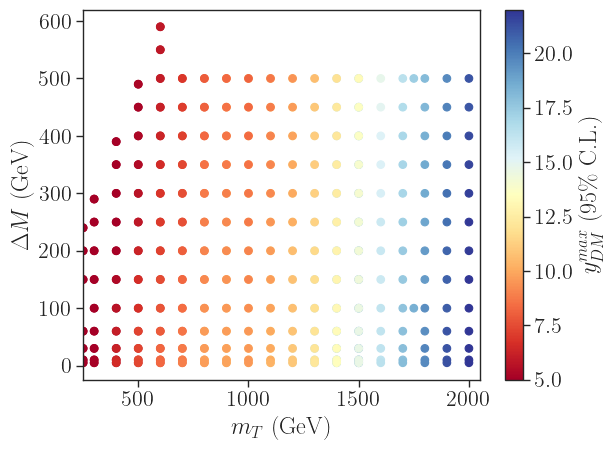

In [3]:
x = recastData['mPsiT']
y = recastData['mSDM']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,2050.)
# plt.yscale('log')
plt.show()

In [5]:
x = recastData['mPsiT']
y = recastData['mSDM']
dm = x-y
z = recastData['Cg (95% C.L.)']*1e6
plt.scatter(x,dm,c=z,cmap=cm,s=30)
plt.colorbar(label=r'$C_{g}^{max}$ TeV$^{-2}$')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
plt.yscale('log')
plt.show()

KeyError: 'Cg (95% C.L.)'

In [6]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['Cq (95% C.L.)']*1e6
plt.scatter(x,dm,c=z,cmap=cm,s=30)
plt.colorbar(label=r'$C_{q}^{max}$ TeV$^{-2}$')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
plt.yscale('log')
plt.show()

KeyError: 'mST'

In [7]:
x = recastData['Cq (95% C.L.)']*1e6
y = recastData['Cg (95% C.L.)']*1e6
plt.scatter(x,y,s=30)
plt.xlabel(r'$C_{q}^{max}$ TeV$^{-2}$')
plt.ylabel(r'$C_{g}^{max}$ TeV$^{-2}$')
# plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

KeyError: 'Cq (95% C.L.)'

### Interpolate for a denser grid

In [4]:
x = recastData['mPsiT']
y = recastData['mSDM']
dm = x-y
z = recastData['yDM (95% C.L.)']
# Interpolate to create more points
xnew,ynew,znew = interpolateData(x,dm,z)
# Get contours
cValues = sorted([4*np.pi, 5.,10.,15.,20.])
contoursDict = getContours(xnew,ynew,znew,cValues)

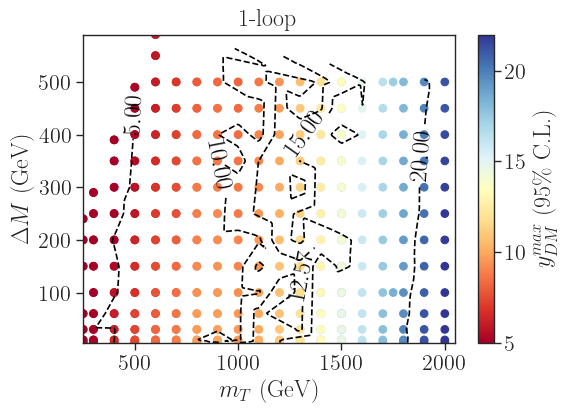

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)

plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop')
plt.xlim(250.,2050.)
plt.show()

In [10]:
recastData[recastData['mPsiT'] ==400.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
18,400.0,10.0,3.975738
19,400.0,50.0,4.008919
20,400.0,100.0,4.105036
21,400.0,150.0,4.221440
22,400.0,200.0,4.350885
23,400.0,250.0,4.510850
24,400.0,300.0,4.664282
25,400.0,340.0,4.796463
26,400.0,370.0,4.898336
27,400.0,390.0,4.972102


In [11]:
recastData[recastData['mPsiT'] ==500.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
29,500.0,10.0,4.970990
30,500.0,50.0,5.002753
31,500.0,100.0,5.071870
32,500.0,150.0,5.180695
33,500.0,200.0,5.304726
34,500.0,250.0,5.439485
35,500.0,300.0,5.589871
36,500.0,350.0,5.750408
37,500.0,400.0,5.914404
38,500.0,440.0,6.045000


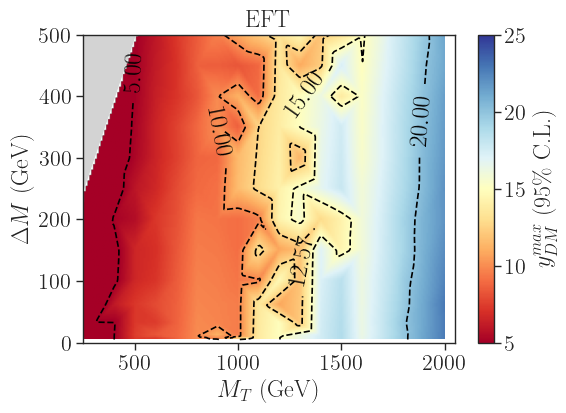

In [8]:
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), dm.min(), dm.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=5,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$M_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.fill_betweenx([250.,600.],[250.,600.],color='lightgray',alpha=1.0, label = r'$M_s > M_{T}$')
plt.title('EFT')
plt.xlim(250.,2050.)
plt.ylim(0.,500.)
plt.savefig('HeatMap_eft.png', bbox_inches='tight')
plt.show()

### Save contour curves to text files

In [7]:
fname = 'CMS_mtt_eft_contours.csv'
saveContours(contoursDict,fname,header='mPsiT_GeV,deltaM_GeV')


Contours saved to CMS_mtt_eft_contours.csv
